## Make reports with Hantek 4032L USB-based 32-channel logic analyzer and sigrok software.

>Developed by [@edyatl](https://github.com/edyatl) March 2024 <edyatl@yandex.ru>

In [1]:
# Load Jupyter extension for auto correction coding style based on Black Lib
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# Install a pip package in the current Jupyter kernel
# import sys

# !{sys.executable} -m pip install -U notebook
# !{sys.executable} -m pip uninstall -y notebook


<IPython.core.display.Javascript object>

## Check two datasets in CSV on storage

In [3]:
# Execute a shell command
!head ../data4.csv && head ../data1.csv

AS3-2,AS3-1,AS4-2,AS4-1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
1,0,0,1
logic1,logic2,logic3,logic4,logic5,logic6
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [4]:
# Standard imports
import os
import logging
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal

from config import Configuration as cfg

# Nicest style for plots
sns.set(style="ticks")

<IPython.core.display.Javascript object>

In [5]:
def get_cls_logger(cls: str) -> object:
    """
    Logger config. Sets handler to a file, formater and logging level.

    :param cls:
        str Name of class where logger calling.
    :return:
        Returns Logger instans.
    """
    logger = logging.getLogger(cls)
    if not logger.handlers:
        handler = logging.FileHandler(cfg.LOG_FILE)
        formatter = logging.Formatter(
            "%(asctime)s %(name)-16s [%(levelname)s] %(message)s", "%Y-%m-%d %H:%M:%S"
        )
        handler.setFormatter(formatter)
        logger.addHandler(handler)
    logger.setLevel(logging.DEBUG if cfg.DEBUG else logging.INFO)
    return logger

<IPython.core.display.Javascript object>

## Load data

**Command line to get dataset.**

```bash
sigrok-cli --driver hantek-4032l \
            --channels A0=start,A1=AS3_2,A2=as3_1,A3=AS1_2 \
            --output-file test001.csv \
            --output-format csv \
            --config samplerate=1000 \
            --samples 2048 \
            --triggers start=r \
            --wait-trigger
```

```bash
sigrok-cli --driver hantek-4032l \
           --channels AS3-2,AS3-1,AS4-2,AS4-1 \
           --output-file output.csv \
           --output-format csv \
           --samples 10240

```

In [6]:
csv_data = os.path.join(os.path.abspath("../"), "data4.csv")
df = pd.read_csv(csv_data)

<IPython.core.display.Javascript object>

In [7]:
csv_data = os.path.join(os.path.abspath("../"), "data1.csv")
df2 = pd.read_csv(csv_data)

<IPython.core.display.Javascript object>

In [8]:
# df = df[507:534]
# df[507:534]
df

,AS3-2,AS3-1,AS4-2,AS4-1
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10235,0,1,0,1
10236,0,1,0,1
10237,0,1,0,1
10238,0,1,0,1


<IPython.core.display.Javascript object>

In [9]:
df2

,logic1,logic2,logic3,logic4,logic5,logic6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
10235,0,0,0,0,0,0
10236,0,0,0,0,0,0
10237,0,0,0,0,0,0
10238,0,0,0,0,0,0


<IPython.core.display.Javascript object>

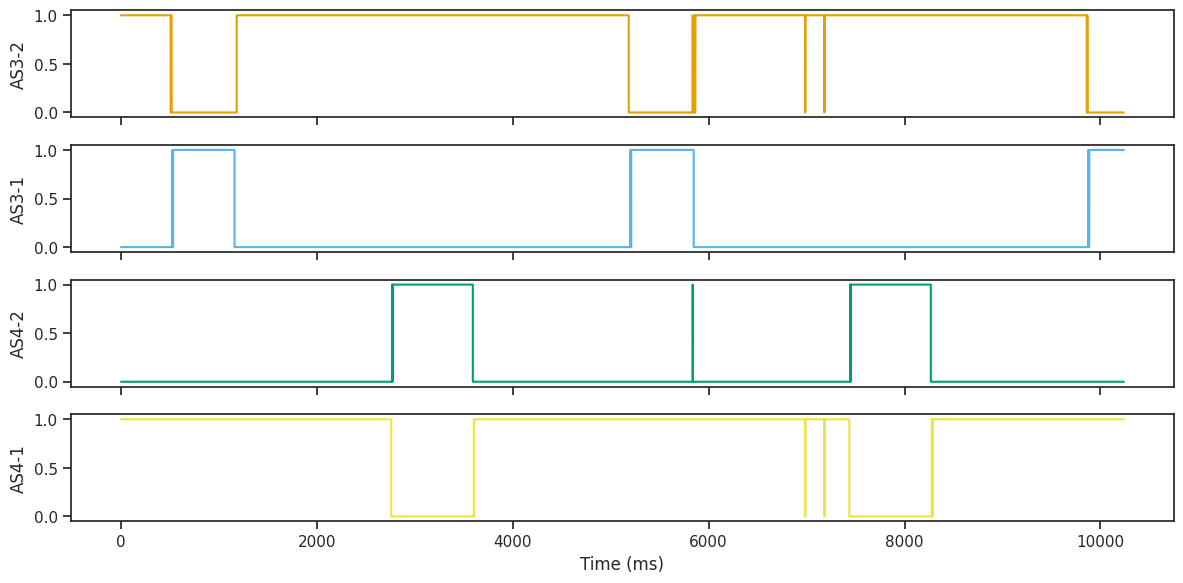

<IPython.core.display.Javascript object>

In [10]:
# Set a list with six main css colors
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

t = df.index
# Set subplots size to 12x6
plt.rcParams["figure.figsize"] = (12, 6)
fig, axes = plt.subplots(4, 1, sharex="col")
for i, col in enumerate(df.columns):
    # print(i, col)
    axes[i].step(t, df[col], colors[i])
    axes[i].set_ylabel(col)

axes[i].set_xlabel("Time (ms)")
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

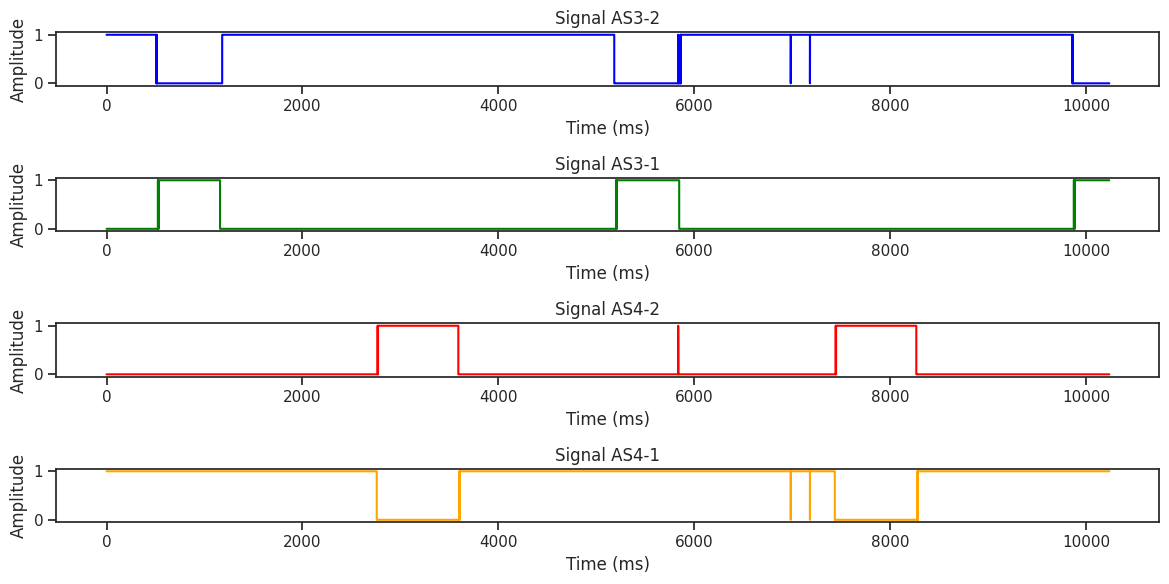

<IPython.core.display.Javascript object>

In [11]:
# Plot each signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS3-2
plt.subplot(411)
plt.step(t, df["AS3-2"], color="blue")
plt.title("Signal AS3-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS3-1
plt.subplot(412)
plt.step(t, df["AS3-1"], color="green")
plt.title("Signal AS3-1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS4-2
plt.subplot(413)
plt.step(t, df["AS4-2"], color="red")
plt.title("Signal AS4-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS4-1
plt.subplot(414)
plt.step(t, df["AS4-1"], color="orange")
plt.title("Signal AS4-1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

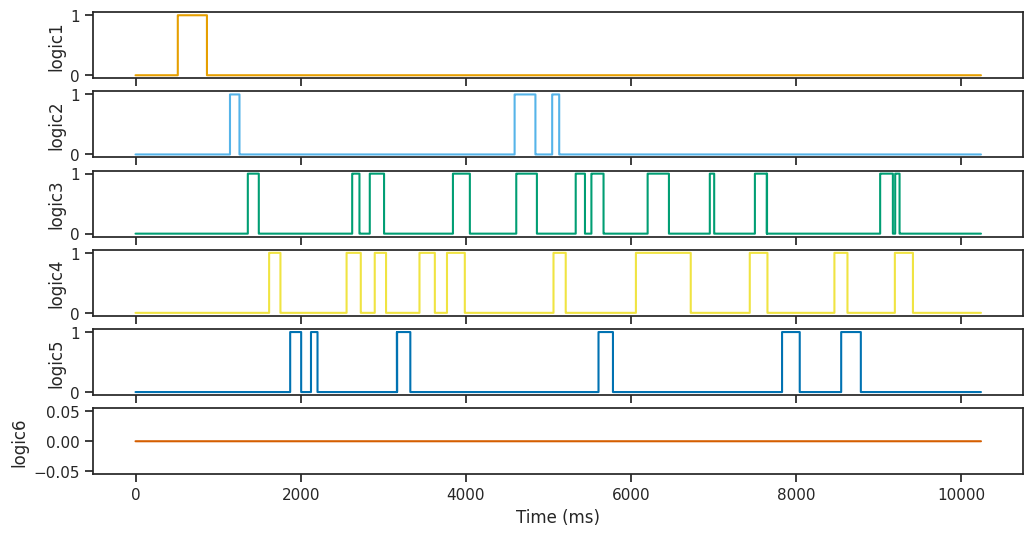

<IPython.core.display.Javascript object>

In [12]:
# Set a list with six main css colors
colors = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

t2 = df2.index
# Set subplots size to 12x6
plt.rcParams["figure.figsize"] = (12, 6)
fig, axes = plt.subplots(6, 1, sharex="col")
for i, col in enumerate(df2.columns):
    # print(i, col)
    axes[i].step(t, df2[col], colors[i])
    # axes[i].set_title(col)
    axes[i].set_xlabel("Time (ms)")
    axes[i].set_ylabel(col)

plt.show()

In [13]:
value_counts = df["AS3-2"].value_counts()

<IPython.core.display.Javascript object>

In [ ]:
value_counts

In [ ]:
# Function to invert values in a consecutive sequence
def invert_consecutive_values(sequence):
    # Count the occurrences of each value in the sequence
    value_counts = sequence.value_counts()
    # Identify values occurring less than 100 times
    invert_values = value_counts[value_counts < 100].index
    # Invert the values for the identified values
    sequence = sequence.loc[sequence.isin(invert_values)] = 1 - sequence
    return sequence

In [ ]:
# Group consecutive values and apply the normalization function
grouped = df.groupby((df["AS3-2"] != df["AS3-2"].shift()).cumsum())
grouped

## Filtering noise in signals series

In [14]:
def noise_filter(ser: pd.Series) -> np.array:
    return signal.medfilt(ser, 15)

<IPython.core.display.Javascript object>

In [15]:
# df['AS3-2'] = noise_filter(df['AS3-2'])
# df['AS4-1'] = noise_filter(df['AS4-1'])
for col in df.columns:
    df[col] = noise_filter(df[col])

<IPython.core.display.Javascript object>

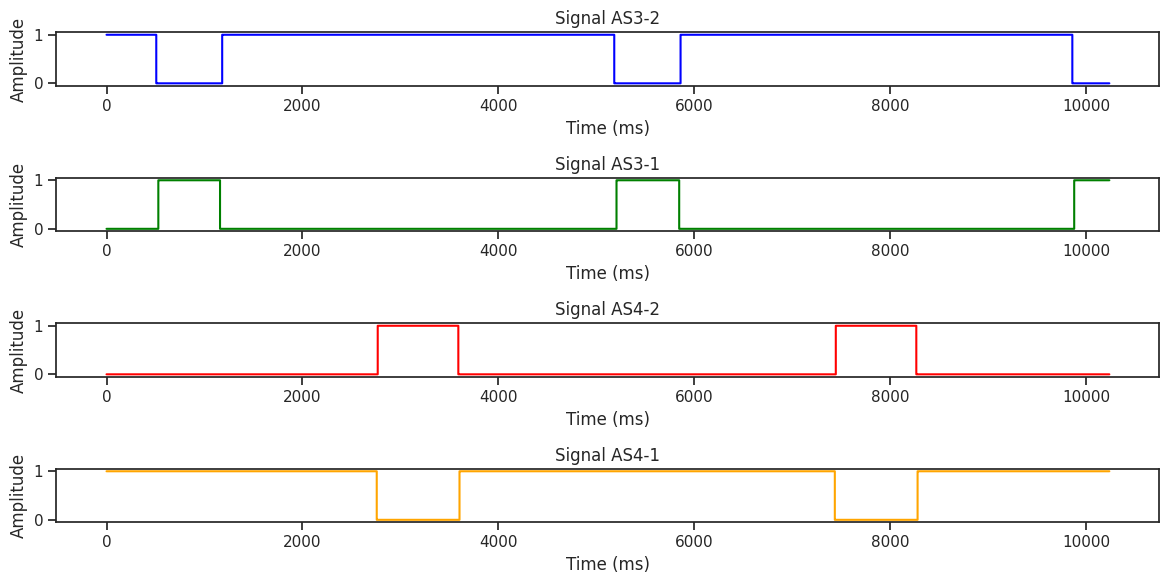

<IPython.core.display.Javascript object>

In [16]:
# Plot each signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS3-2
plt.subplot(411)
plt.step(t, df["AS3-2"], color="blue")
plt.title("Signal AS3-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS3-1
plt.subplot(412)
plt.step(t, df["AS3-1"], color="green")
plt.title("Signal AS3-1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS4-2
plt.subplot(413)
plt.step(t, df["AS4-2"], color="red")
plt.title("Signal AS4-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot Signal AS4-1
plt.subplot(414)
plt.step(t, df["AS4-1"], color="orange")
plt.title("Signal AS4-1")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

## Mesuring of signal pulse width

In [17]:
# The function measures the signal pulse width
def signal_pulse_pivots(ser: pd.Series) -> np.array:
    return np.diff(ser)

<IPython.core.display.Javascript object>

In [18]:
sig_pivots = signal_pulse_pivots(df["AS4-2"])
sig_pivots1 = signal_pulse_pivots(df["AS4-1"])
sig_pivots2 = signal_pulse_pivots(df["AS3-2"])
sig_pivots3 = signal_pulse_pivots(df["AS3-1"])
# np.indices(sig_pivots.shape)

<IPython.core.display.Javascript object>

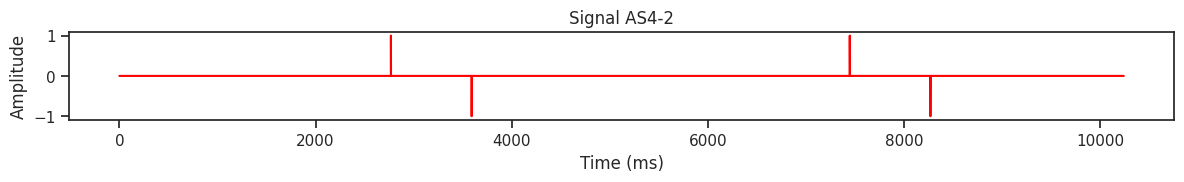

<IPython.core.display.Javascript object>

In [19]:
# Plot diff signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS4-2
plt.subplot(413)
plt.step(np.indices(sig_pivots.shape).ravel(), sig_pivots, color="red")
plt.title("Signal AS4-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()  # Show the plot

In [20]:
# The function measures the signal n pulse width and returns tuple (1st pulse x1 point, 1st pulse x2 point, pulse time interval)
def signal_pulse_width(ser: pd.Series, n: int) -> tuple:
    n = n + 1 if n > 0 else 0
    return (
        np.where(ser != 0)[0][n],
        np.where(ser != 0)[0][n + 1],
        np.where(ser != 0)[0][n + 1] - np.where(ser != 0)[0][n],
    )

<IPython.core.display.Javascript object>

In [21]:
sig_tpl0 = signal_pulse_width(sig_pivots, 0)
sig_tpl1 = signal_pulse_width(sig_pivots, 1)
sig_tpl0

(2769, 3592, 823)

<IPython.core.display.Javascript object>

In [22]:
# Function to calculate number of pulses
def signal_pulse_count(ser: pd.Series) -> int:
    return len(np.where(ser != 0)[0]) // 2


<IPython.core.display.Javascript object>

In [23]:
pulses_n = signal_pulse_count(sig_pivots3)
pulses_n

2

<IPython.core.display.Javascript object>

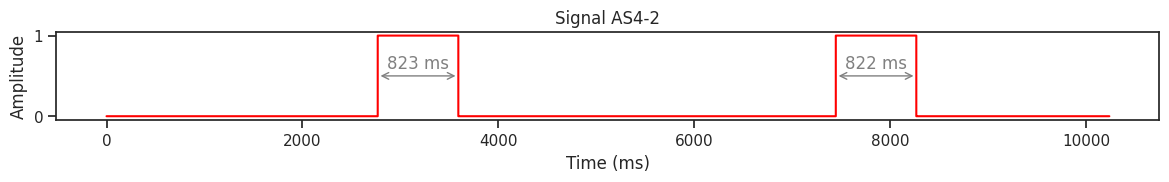

<IPython.core.display.Javascript object>

In [24]:
# Plot each signal
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot Signal AS4-2
plt.subplot(413)
plt.step(t, df["AS4-2"], color="red")
plt.title("Signal AS4-2")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")

# Plot vertical lines through X1 and X2
# plt.axvline(sig_tpl[0], color="green", linestyle="--", label="X1")
# plt.axvline(sig_tpl[1], color="blue", linestyle="--", label="X2")

# Plot horizontal line with arrow representing width
plt.annotate(
    "",
    xy=(sig_tpl0[0], 0.5),
    xytext=(sig_tpl0[1], 0.5),
    arrowprops=dict(arrowstyle="<->", color="gray"),
)
plt.text(
    (sig_tpl0[0] + sig_tpl0[1]) / 2,
    0.6,
    f"{sig_tpl0[2]} ms",
    ha="center",
    color="gray",
)
plt.annotate(
    "",
    xy=(sig_tpl1[0], 0.5),
    xytext=(sig_tpl1[1], 0.5),
    arrowprops=dict(arrowstyle="<->", color="gray"),
)
plt.text(
    (sig_tpl1[0] + sig_tpl1[1]) / 2,
    0.6,
    f"{sig_tpl1[2]} ms",
    ha="center",
    color="gray",
)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
# plt.legend()  # Show legend
plt.show()  # Show the plot

In [25]:
# Set A4 canvas size in inches
a4_width_inches = 8.27
a4_height_inches = 11.69

<IPython.core.display.Javascript object>

In [26]:
def plot_width(x1: int, x2: int, width: int, i: int) -> None:
    axes[i].annotate(
        "",
        xy=(x1, 0.5),
        xytext=(x2, 0.5),
        arrowprops=dict(arrowstyle="<->", color=cfg.CLR_DICT["gray"]),
    )
    axes[i].text(
        (x1 + x2) / 2,
        0.6,
        f"{width} ms",
        ha="center",
        color=cfg.CLR_DICT["gray"],
    )

<IPython.core.display.Javascript object>

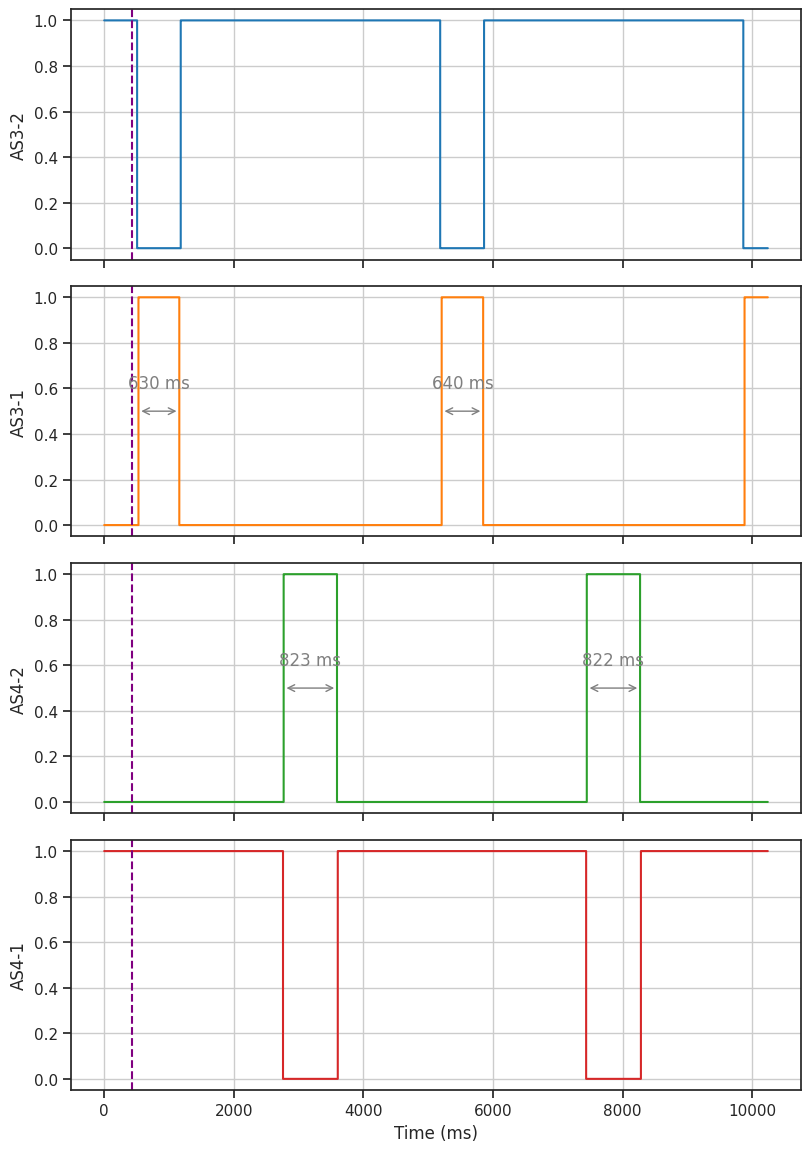

<IPython.core.display.Javascript object>

In [27]:
# Set a list with six main css colors
colors = ["blue", "green", "red", "orange", "#0072B2", "#D55E00", "#CC79A7"]

t = df.index
# Set subplots size to a4_width_inches x a4_height_inches
plt.rcParams["figure.figsize"] = (a4_width_inches, a4_height_inches)
fig, axes = plt.subplots(4, 1, sharex="col")
for i, col in enumerate(df.columns):
    # print(i, col)
    sig_pivots = signal_pulse_pivots(df[col])
    axes[i].step(t, df[col], cfg.COLORS[i])
    axes[i].set_ylabel(col)

    if col == "AS3-1" or col == "AS4-2":
        for j in range(2):
            plot_width(*signal_pulse_width(sig_pivots, j), i)
for ax in axes:
    ax.grid(cfg.SHOW_GRID)  # Add grid to each subplot
    ax.axvline(
        423,
        color="purple",
        linestyle="--",
        label="X1",
    )


plt.xlabel("Time (ms)")
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
# Save the plot as a PDF file with A4 canvas size
plt.savefig(cfg.REPORT_NAME, format="pdf", dpi=300)
plt.show()

## Checking for USB flash storage and file name

In [28]:
def list_files_recursive(dirpath: str) -> list:
    """
    Recursively get all PDF filenames with full path from a given directory.

    :param dirpath: str
        The directory to start find PDF files recursively with all nested subdirectories.
    :return: list
        Returns a list of PDF filenames with full paths.
    """
    global input_dir
    global output_dir
    input_dir = os.path.abspath(dirpath)
    output_dir = os.path.join(input_dir, os.path.basename(input_dir) + "-PDFs")
    return glob.glob(
        os.path.join(os.path.abspath(dirpath), "**", "*.[pP][dD][fF]"), recursive=True
    )


<IPython.core.display.Javascript object>

In [29]:
def mk_output_dir(dirpath: str) -> None:
    """
    Makes output directory if it doesn't exists.

    :param dirpath: str
        Output directory name with full path.
    """
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

<IPython.core.display.Javascript object>

## Saving PDF file with plots to USB flash drive

In [30]:
cfg.USB_DEVICE

'sdb'

<IPython.core.display.Javascript object>

In [31]:
cfg.USB_DRIVE

'/dev/sdb1'

<IPython.core.display.Javascript object>

In [32]:
cfg.USB_PART

'sdb1'

<IPython.core.display.Javascript object>

In [33]:
cfg.DATA_DIR_NAME

'data'

<IPython.core.display.Javascript object>

In [34]:
cfg.REPORT_NAME

'2024-03-06-{IDX}.pdf'

<IPython.core.display.Javascript object>

In [35]:
cfg.TIME_UNITS

'ms'

<IPython.core.display.Javascript object>

In [36]:
cfg.COLORS[0]

'#1f77b4'

<IPython.core.display.Javascript object>

In [37]:
cfg.CLR_DICT["blue"]

'#1f77b4'

<IPython.core.display.Javascript object>

In [38]:
cfg.CURRENT_DATE

'2024-03-06'

<IPython.core.display.Javascript object>

In [47]:
class StorageController:
    """Class to control USB storage"""

    def __init__(self):
        self.usb_plugged: bool = self.check_usb_plugged()
        self.mount_point: str = None
        self.data_dir: str = None
        self.pdf_files: list = []
        self.last_pdf_report: str = None
        self.last_pdf_report_date: str = None
        self.last_pdf_report_idx: int = 0
        self.current_pdf_report: str = None
        self.free_space: int = 0
        self.ready_to_write: bool = False

        if self.usb_plugged:
            self.get_mount_point()
            self.create_data_directory()
            self.get_pdf_files()
            self.get_last_pdf_report()
            self.get_last_pdf_report_date()
            self.get_last_pdf_report_idx()
            self.set_current_pdf_report()
            self.get_free_space()

            if self.free_space > cfg.WRITE_TRESHOLD:
                self.ready_to_write = True

    def check_usb_plugged(self) -> bool:
        return os.path.exists(cfg.USB_DRIVE)

    def get_mount_point(self) -> None:
        with open("/proc/mounts") as mounts:
            for line in mounts:
                if cfg.USB_DRIVE in line:
                    self.mount_point = line.split()[1]
                    break

    def create_data_directory(self) -> None:
        self.data_dir = os.path.join(self.mount_point, cfg.DATA_DIR_NAME)
        if not os.path.exists(self.data_dir):
            os.mkdir(self.data_dir)

    def get_pdf_files(self) -> None:
        self.pdf_files = [
            f for f in os.listdir(self.data_dir) if f.lower().endswith(".pdf")
        ]

    def get_last_pdf_report(self) -> None:
        if self.pdf_files:
            self.last_pdf_report = sorted(self.pdf_files)[-1]

    def get_last_pdf_report_date(self) -> None:
        if self.last_pdf_report:
            self.last_pdf_report_date = "-".join(self.last_pdf_report.split("-")[:3])

    def get_last_pdf_report_idx(self) -> None:
        if self.last_pdf_report:
            self.last_pdf_report_idx = int(
                self.last_pdf_report.split("-")[3].split(".")[0]
            )

    def set_current_pdf_report(self) -> None:
        idx = (
            1
            if cfg.CURRENT_DATE != self.last_pdf_report_date
            else self.last_pdf_report_idx + 1
        )
        self.current_pdf_report = os.path.join(
            self.data_dir, cfg.REPORT_NAME.format(IDX=str(idx).zfill(3))
        )

    def get_free_space(self) -> None:
        statvfs: os.statvfs = os.statvfs(self.mount_point)
        self.free_space = statvfs.f_frsize * statvfs.f_bavail

<IPython.core.display.Javascript object>

In [50]:
# Example usage
usb_storage = StorageController()
print("USB Plugged:", usb_storage.usb_plugged)
print("Mount Point:", usb_storage.mount_point)
print("Data Directory:", usb_storage.data_dir)
print("PDF Files:", usb_storage.pdf_files)
print("Last PDF Report:", usb_storage.last_pdf_report)
print("Last PDF Report date:", usb_storage.last_pdf_report_date)
print("Last PDF Report index:", usb_storage.last_pdf_report_idx)
print("Current PDF Report:", usb_storage.current_pdf_report)
print("Free Space:", usb_storage.free_space)
print("Ready to Write:", usb_storage.ready_to_write)

USB Plugged: True
Mount Point: /run/media/edyatl/usbstick
Data Directory: /run/media/edyatl/usbstick/data
PDF Files: ['2024-03-06-001.pdf', '2024-03-06-002.pdf', '2024-03-06-003.pdf']
Last PDF Report: 2024-03-06-003.pdf
Last PDF Report date: 2024-03-06
Last PDF Report index: 3
Current PDF Report: /run/media/edyatl/usbstick/data/2024-03-06-004.pdf
Free Space: 4078530560
Ready to Write: True


<IPython.core.display.Javascript object>

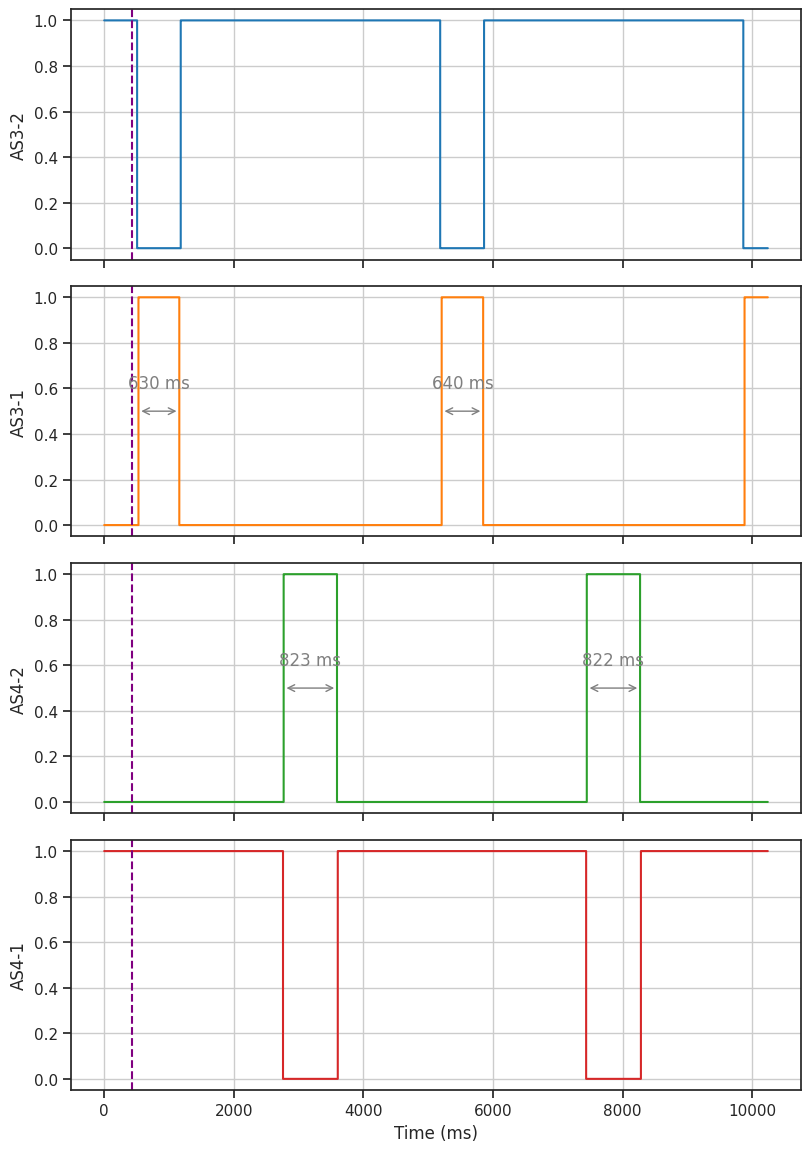

<IPython.core.display.Javascript object>

In [49]:
t = df.index
# Set subplots size to a4_width_inches x a4_height_inches
plt.rcParams["figure.figsize"] = (a4_width_inches, a4_height_inches)
fig, axes = plt.subplots(4, 1, sharex="col")
for i, col in enumerate(df.columns):
    # print(i, col)
    sig_pivots = signal_pulse_pivots(df[col])
    axes[i].step(t, df[col], cfg.COLORS[i])
    axes[i].set_ylabel(col)

    if col == "AS3-1" or col == "AS4-2":
        for j in range(2):
            plot_width(*signal_pulse_width(sig_pivots, j), i)
for ax in axes:
    ax.grid(cfg.SHOW_GRID)  # Add grid to each subplot
    ax.axvline(
        423,
        color="purple",
        linestyle="--",
        label="X1",
    )


plt.xlabel("Time (ms)")
plt.tight_layout()  # Adjust subplot layout to prevent overlapping
# Save the plot as a PDF file with A4 canvas size
plt.savefig(
    usb_storage.current_pdf_report,
    format="pdf",
    dpi=300,
)
plt.show()

In [ ]:
from datetime import datetime

CURRENT_DATE = datetime.now().strftime("%Y-%m-%d")
IDX_STR = "{COUNT}"

REPORT_NAME = f"{CURRENT_DATE}-{IDX_STR}.pdf"

REPORT_NAME.format(COUNT=str(3).zfill(3))



In [ ]:
lst = REPORT_NAME.format(COUNT=str(3).zfill(3)).split("-")
lst

In [ ]:
idx = int(lst[3].split(".")[0])
idx

In [ ]:
rep_date = "-".join(lst[:3])
rep_date